In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/section17pandas/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
help(pd.DataFrame)

Series, DataFrames, and CSVs

In [ ]:
# main datatypes  series and dataframes

In [ ]:
series = pd.Series(['BMW', 'Toyta', 'Honda'])

In [ ]:
series 
#series are 1 dimensional (aka a single column of data)

In [ ]:
colors = pd.Series(['Red', 'Blue', 'White'])
colors

In [ ]:
#dataframes are 2 dimensional and far more common
df = pd.DataFrame({'Car Make': series, 'Color': colors})
df

In [ ]:
#import data
df = pd.read_csv('/kaggle/input/section17pandas/data/JW_car-sales.csv')
df

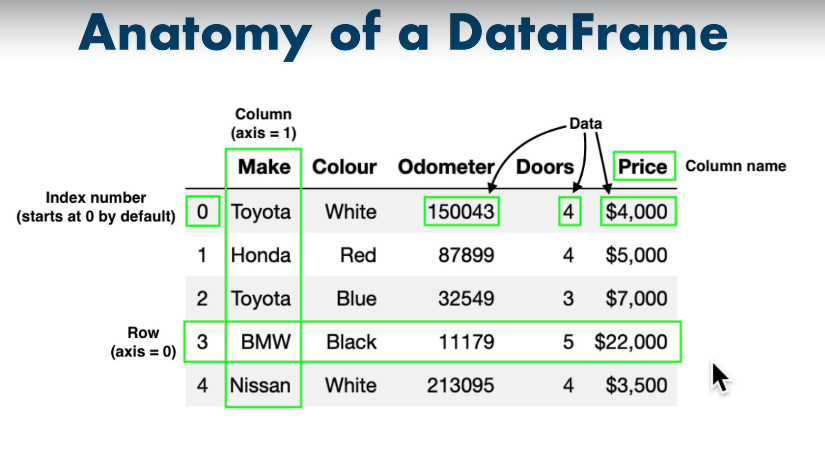

In [ ]:
#exporting a dataframe
df.to_csv('/kaggle/input/section17pandas/data/JW_car_sales_exported2.csv', index = False)
#when exporting the data pandas will also export the index column
#setting index = False won't include the index in the outputted csv file
#when the index is valuable information we need to keep index = True
#when the index is the standard 0-n numerical values we can set index = False

Data from URLs

In [ ]:
heart_disease = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv')

Describe Data w/ Pandas

In [ ]:
df

In [ ]:
df.dtypes
#dtypes is an attribute

In [ ]:
df.columns
car_columns = df.columns
print(car_columns)

In [ ]:
df.index

In [ ]:
df.describe()
#gives some statistical datda about our numerical columns

In [ ]:
df.info()

In [ ]:
df.mean()
#returns mean values of numerical columns
#can also call mean() method on individual series

In [ ]:
df.sum()
#sum up all the values for each column
#not really useful calling it on the whole dataframe
# we could, instead, call it on a specific column
df['Odometer (KM)'].sum()

In [ ]:
len(df)
#get the overall length of the df.


Selecting and Viewing Data w/ Pandas

In [ ]:
df.head(4)

In [ ]:
df.tail(6)

In [ ]:
animals = pd.Series(['cat', 'dog', 'bird', 'panda', 'snake'],
                   index = [0, 3, 9, 8, 3])
animals

In [ ]:
animals.loc[3]
#returns values that have index values of 3

In [ ]:
animals.loc[9]

In [ ]:
animals.iloc[3]
#returns whatever value is in the 3rd index location

In [ ]:
df.loc[3]

In [ ]:
df.iloc[3]

In [ ]:
#can also use slicing with .loc[] and .iloc[]
animals.iloc[:3]

In [ ]:
df.iloc[:3]

In [ ]:
df.loc[:3]

In [ ]:
print(df['Make'])
print(df.Make)  #these are both the same thing

In [ ]:
df[df['Make'] == 'Toyota']

In [ ]:
df[df['Odometer (KM)'] > 100000]

In [ ]:
pd.crosstab(df['Make'], df['Doors'])
#great way to compare 2 columns
#honda has 3 cars all with 4 doors


In [ ]:
#comparing multiple columns
df.groupby(['Make']).mean()
#this will calculate the mean for all numeric columns for each group

In [ ]:
df['Odometer (KM)'].plot()

In [ ]:
df['Odometer (KM)'].hist()

In [ ]:
#notice how price wasn't included in the about mean() method
#this is because its text, not numeric
print(df['Price'].dtype)
df['Price'] = df['Price'].str.replace('[\$\,]', '').astype(float)

In [ ]:
df.dtypes

In [ ]:
df

Manipulating Data

In [ ]:
df['Make'] = df['Make'].str.lower()
df.head()

In [ ]:
df_missing = pd.read_csv('../input/section17pandas/data/JW_car-sales-missing-data.csv')
df_missing

In [ ]:
#fill missing values in odometer column
df_missing['Odometer'].fillna(df_missing['Odometer'].mean(), inplace = True)
df_missing

In [ ]:
#remove rows with missing values
df_missing.dropna(axis = 0, inplace = True)
df_missing

In [ ]:
df_missing = pd.read_csv('../input/section17pandas/data/JW_car-sales-missing-data.csv')
